![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [705]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [706]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [707]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [708]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [709]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [710]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [711]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [712]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [713]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [714]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [715]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [716]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [717]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
16814,id_362,Hamburg,"['Italian', 'Vegetarian Friendly']",363.0,$$$$,36.0,"[['The best italian restaurant in Hamburg', 'M...",/Restaurant_Review-g187331-d4942717-Reviews-Il...,d4942717,1,4.5
40383,id_1684,Berlin,"['Cafe', 'European', 'Russian', 'Central Europ...",1686.0,$$ - $$$,70.0,"[['Brunch that requires hours to munch', 'Grea...",/Restaurant_Review-g187323-d715321-Reviews-Gag...,d715321,1,4.0
5085,id_5085,Budapest,NaN,2393.0,NaN,21.0,"[['Nice bar', 'Scam joint'], ['10/24/2017', '1...",/Restaurant_Review-g274887-d8410377-Reviews-Ha...,d8410377,0,0.0
25653,id_2020,Prague,NaN,2023.0,NaN,NaN,"[['Great cakes and cheap but good lunches'], [...",/Restaurant_Review-g274707-d10716601-Reviews-L...,d10716601,1,5.0
36678,id_6727,Madrid,NaN,6730.0,NaN,8.0,"[['Try the steak!'], ['04/01/2015']]",/Restaurant_Review-g187514-d5487074-Reviews-Re...,d5487074,1,3.5


In [718]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [719]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [720]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [721]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [722]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

In [723]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0


#### Возьмем следующий признак "Price Range".

In [724]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [725]:
data[data['Price Range'].isna()]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN
7,id_7,Budapest,NaN,2330.0,NaN,0.0,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,0.0,1
8,id_8,Helsinki,"['European', 'Scandinavian']",771.0,NaN,2.0,"[['Big group supper', 'Good food but very slow...",/Restaurant_Review-g189934-d12947542-Reviews-B...,d12947542,0,0.0,0
9,id_9,Stockholm,['Italian'],605.0,NaN,13.0,"[['Good food', 'Good pizza'], ['12/02/2017', '...",/Restaurant_Review-g189852-d12716384-Reviews-I...,d12716384,0,0.0,0
10,id_10,Rome,NaN,1209.0,NaN,306.0,"[['Very pretentious, but drinks are top notch'...",/Restaurant_Review-g187791-d7818546-Reviews-Je...,d7818546,0,0.0,0
13,id_13,Hamburg,NaN,1000.0,NaN,30.0,"[['Surprisingly good pizza', 'Yummy'], ['09/28...",/Restaurant_Review-g187331-d1344523-Reviews-Il...,d1344523,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49988,id_4968,Berlin,NaN,4970.0,NaN,0.0,"[[], []]",/Restaurant_Review-g187323-d7761701-Reviews-Ar...,d7761701,1,4.0,1
49989,id_8887,London,['International'],8896.0,NaN,0.0,"[['I love this place!'], ['08/24/2015']]",/Restaurant_Review-g186338-d5550626-Reviews-Th...,d5550626,1,5.0,1
49990,id_1187,Oporto,"['European', 'Portuguese']",1188.0,NaN,14.0,"[['Traditional ""home cooked"" food for an ""eco....",/Restaurant_Review-g189180-d3612719-Reviews-D_...,d3612719,1,4.5,0
49993,id_6057,Paris,NaN,6058.0,NaN,16.0,"[['Naught but VERY nice', 'Yum'], ['01/23/2017...",/Restaurant_Review-g187147-d10532509-Reviews-B...,d10532509,1,4.0,0


In [726]:
# Вынесем информацию о наличии пропусков как отдельный признак и посмотрим на моду ценового диапазона по городам (поэтому я удалила ваш код)
data['Price_Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')
data.groupby('City')['Price Range'].agg(pd.Series.mode)

City
Amsterdam     $$ - $$$
Athens        $$ - $$$
Barcelona     $$ - $$$
Berlin        $$ - $$$
Bratislava    $$ - $$$
Brussels      $$ - $$$
Budapest      $$ - $$$
Copenhagen    $$ - $$$
Dublin        $$ - $$$
Edinburgh     $$ - $$$
Geneva        $$ - $$$
Hamburg       $$ - $$$
Helsinki      $$ - $$$
Krakow        $$ - $$$
Lisbon        $$ - $$$
Ljubljana     $$ - $$$
London        $$ - $$$
Luxembourg    $$ - $$$
Lyon          $$ - $$$
Madrid        $$ - $$$
Milan         $$ - $$$
Munich        $$ - $$$
Oporto        $$ - $$$
Oslo          $$ - $$$
Paris         $$ - $$$
Prague        $$ - $$$
Rome          $$ - $$$
Stockholm     $$ - $$$
Vienna        $$ - $$$
Warsaw        $$ - $$$
Zurich        $$ - $$$
Name: Price Range, dtype: object

Мода одинаковая, меняем

In [727]:
data['Price Range'].fillna((data['Price Range'].mode()[0]), inplace=True)
data['Price Range'].value_counts(dropna=False)

$$ - $$$    40402
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [728]:
# создаем словарь для замены значений столбца Price Range последовательными числами 1, 2 и 3 и сразу же их меняем
price_range_dict = {'$': 1,
                    '$$ - $$$': 2,
                    '$$$$': 3}
data['Price Range'] = data['Price Range'].map(price_range_dict)
data['Price Range'].value_counts(dropna=False)

2    40402
1     7816
3     1782
Name: Price Range, dtype: int64

In [729]:
data.groupby('City')['Price Range'].mean() # найдём самые "дорогие" города

City
Amsterdam     1.871720
Athens        1.798969
Barcelona     1.856259
Berlin        1.862477
Bratislava    1.936842
Brussels      1.907915
Budapest      1.807052
Copenhagen    1.934066
Dublin        1.839713
Edinburgh     1.766443
Geneva        2.033898
Hamburg       1.940135
Helsinki      1.911579
Krakow        1.763538
Lisbon        1.822101
Ljubljana     1.819820
London        1.861949
Luxembourg    1.984791
Lyon          1.944938
Madrid        1.916077
Milan         1.845583
Munich        1.944105
Oporto        1.772586
Oslo          1.959016
Paris         1.926981
Prague        1.840308
Rome          1.788722
Stockholm     1.969022
Vienna        1.914761
Warsaw        1.886486
Zurich        1.981022
Name: Price Range, dtype: float64

Создадим колонку со средней ценой по городу

In [730]:
city_mean_price = data.groupby('City')['Price Range'].mean().to_dict()
data['city_price'] = data['City'].map(city_mean_price)
data

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,Price_Range_isNAN,city_price
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,1.926981
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,1.911579
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0,1.766443
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,0,1.861949
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0,1.936842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,0,0,1.845583
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,0,0,1.926981
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,2,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,0,1,1.969022
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,0,0,1.886486


# **City**

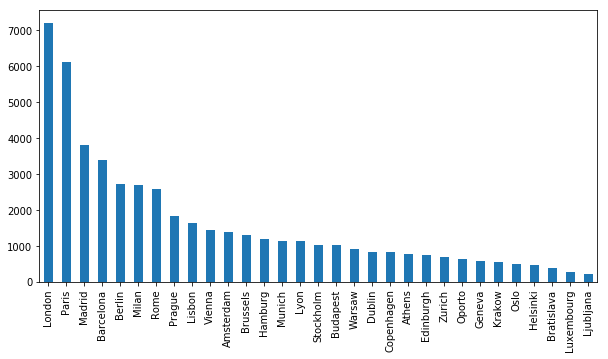

In [731]:
plt.figure(figsize=(10,5))
data.City.value_counts(dropna=False, ascending=False).plot(kind='bar');

In [732]:
# заменим ошибку в Порту
data.loc[data.City == 'Oporto', 'City'] = 'Porto'

# **Cuisine_Style**

In [733]:
Cuisine_ser = data[~data['Cuisine Style'].isna()]['Cuisine Style']
Cuisine_ser = Cuisine_ser.astype('str').apply(lambda x: eval(x))
Cuisine_ser = Cuisine_ser.explode()
Cuisine_cnts = Cuisine_ser.value_counts()

In [734]:
print(list(Cuisine_cnts))
print()
print(len(Cuisine_cnts))

[14021, 12561, 7820, 7433, 5684, 5185, 4094, 3970, 3786, 3502, 3456, 3058, 2883, 2122, 1992, 1966, 1878, 1860, 1727, 1642, 1450, 1446, 1385, 1328, 980, 923, 877, 820, 773, 768, 758, 748, 745, 729, 710, 652, 630, 629, 622, 617, 608, 574, 572, 490, 473, 462, 453, 449, 444, 397, 375, 373, 368, 352, 336, 335, 299, 225, 223, 223, 214, 206, 199, 193, 173, 168, 152, 140, 130, 124, 121, 104, 100, 96, 90, 85, 77, 71, 66, 58, 56, 51, 51, 38, 36, 36, 33, 32, 30, 30, 30, 29, 27, 27, 24, 24, 23, 23, 22, 21, 20, 20, 18, 17, 17, 16, 13, 12, 12, 8, 8, 7, 7, 5, 5, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1]

125


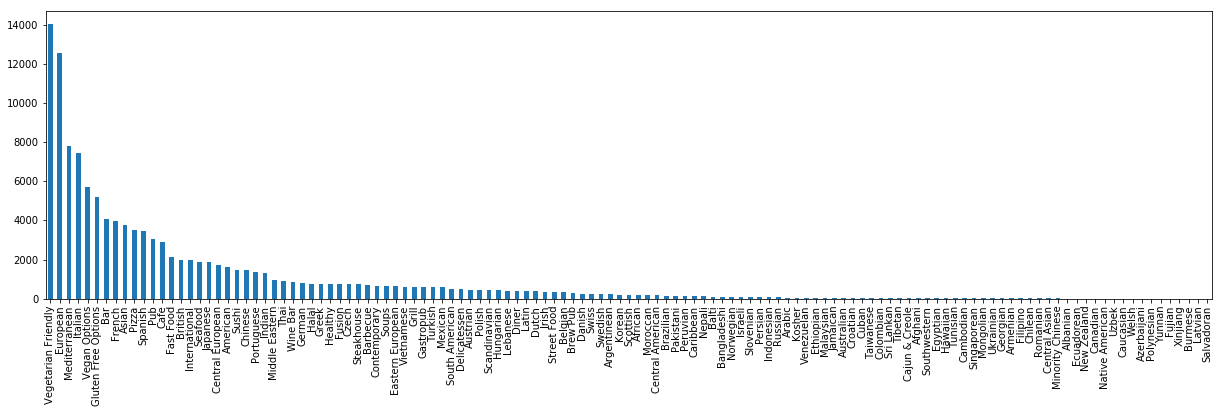

In [735]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2.7, 1])
Cuisine_ser.value_counts().plot(kind='bar')

большинство кухонь представлено в малом значении, а значит можно их заменить на "other cuisine", оставив только топовые 

In [736]:
Cuisine_limit = 400 
Cuisine_columns = list(Cuisine_cnts[Cuisine_cnts > Cuisine_limit].index)
Other_columns = list(set(Cuisine_cnts.index) - set(Cuisine_columns))

In [737]:
# проверяем
print(Cuisine_columns)
print()
print(Other_columns)

['Vegetarian Friendly', 'European', 'Mediterranean', 'Italian', 'Vegan Options', 'Gluten Free Options', 'Bar', 'French', 'Asian', 'Pizza', 'Spanish', 'Pub', 'Cafe', 'Fast Food', 'British', 'International', 'Seafood', 'Japanese', 'Central European', 'American', 'Sushi', 'Chinese', 'Portuguese', 'Indian', 'Middle Eastern', 'Thai', 'Wine Bar', 'German', 'Halal', 'Greek', 'Healthy', 'Fusion', 'Czech', 'Steakhouse', 'Barbecue', 'Contemporary', 'Soups', 'Eastern European', 'Vietnamese', 'Grill', 'Gastropub', 'Turkish', 'Mexican', 'South American', 'Delicatessen', 'Austrian', 'Polish', 'Scandinavian', 'Hungarian']

['Slovenian', 'Irish', 'Korean', 'Fujian', 'Ukrainian', 'Central American', 'Belgian', 'Israeli', 'Romanian', 'Latvian', 'Yunnan', 'New Zealand', 'Norwegian', 'Canadian', 'Street Food', 'Native American', 'Jamaican', 'Albanian', 'Lebanese', 'Singaporean', 'Cambodian', 'Scottish', 'Arabic', 'Australian', 'Kosher', 'Taiwanese', 'African', 'Hawaiian', 'Caucasian', 'Moroccan', 'Mongoli

In [738]:
# создаём дамми переменные для кухонь и заменим пропуски на "европейскуюю"
data['Cuisine Style'] = data['Cuisine Style'].fillna(
    "['European']")

for Cuisine in Cuisine_columns:
    data[Cuisine] = data['Cuisine Style'].astype(
        'str').apply(lambda x: 1 if Cuisine in x else 0)


def other_cuisine(cuisine_str):
    for Cuisine in Other_columns:
        if Cuisine in cuisine_str:
            return 1
    return 0


data['Other cuisine'] = data['Cuisine Style'].astype(
    'str').apply(other_cuisine)

data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Gastropub,Turkish,Mexican,South American,Delicatessen,Austrian,Polish,Scandinavian,Hungarian,Other cuisine
19142,id_1407,London,"['Italian', 'Pizza', 'Mediterranean', 'Vegetar...",1409.0,2,282.0,"[['Great Restaurant', 'Celebration Dinner!'], ...",/Restaurant_Review-g186338-d754559-Reviews-Ant...,d754559,1,...,0,0,0,0,0,0,0,0,0,0
42619,id_5834,London,"['Mediterranean', 'Greek', 'Steakhouse']",5843.0,2,52.0,"[['Lovely', 'Decent enough in quiet old fashio...",/Restaurant_Review-g186338-d2173049-Reviews-St...,d2173049,1,...,0,0,0,0,0,0,0,0,0,0
27960,id_24,Madrid,"['Mediterranean', 'European', 'Spanish', 'Vege...",25.0,2,325.0,"[['My first visit and I’ll be back', 'Amazing ...",/Restaurant_Review-g187514-d10230420-Reviews-R...,d10230420,1,...,0,0,0,0,0,0,0,0,0,0
48132,id_2040,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly']",2045.0,3,26.0,"[['Great end to a Culinary Cruise', 'Cooking c...",/Restaurant_Review-g188590-d2163230-Reviews-De...,d2163230,1,...,0,0,0,0,0,0,0,0,0,1
42337,id_1425,Copenhagen,"['Asian', 'Vietnamese', 'Vegetarian Friendly']",1428.0,2,35.0,"[['We Just Needed Some Asian Food, Any Asian.....",/Restaurant_Review-g189541-d8862867-Reviews-Le...,d8862867,1,...,0,0,0,0,0,0,0,0,0,0


# **Number reviews**

In [739]:
data[data['Number of Reviews'].isna()]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Gastropub,Turkish,Mexican,South American,Delicatessen,Austrian,Polish,Scandinavian,Hungarian,Other cuisine


In [740]:
# не понимаю, почему в каггле не работает, но пропуски там, где либо 0 значений, либо 1, поэтому можно заменить
df_slice = data[data['Number of Reviews'].isna()]
data = data.dropna(subset=['Number of Reviews'], axis=0)
df_slice['Number of Reviews'] = df_slice['Reviews'].apply(
    lambda x: 0 if x == "[[], []]" else 1)
data = pd.concat([data, df_slice])
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Gastropub,Turkish,Mexican,South American,Delicatessen,Austrian,Polish,Scandinavian,Hungarian,Other cuisine
49806,id_160,Madrid,"['European', 'Portuguese']",161.0,3,222.0,"[['Excelent cod in any variation', 'The best c...",/Restaurant_Review-g187514-d1553154-Reviews-Tr...,d1553154,1,...,0,0,0,0,0,0,0,0,0,0
36606,id_2507,Prague,['Cafe'],2512.0,2,2.0,"[['A gem off the beaten track'], ['03/06/2016']]",/Restaurant_Review-g274707-d7124026-Reviews-Ti...,d7124026,1,...,0,0,0,0,0,0,0,0,0,0
24286,id_1218,Brussels,"['French', 'American', 'Belgian', 'European', ...",1217.0,2,4.0,"[['AMAZING...', 'French Bakery at its best'], ...",/Restaurant_Review-g188644-d12644099-Reviews-R...,d12644099,1,...,0,0,0,0,0,0,0,1,0,1
9282,id_9282,Prague,"['European', 'Central European']",1686.0,2,2.0,"[['Cosy place', 'A friendly cup of coffee!'], ...",/Restaurant_Review-g274707-d12509182-Reviews-J...,d12509182,0,...,0,0,0,0,0,0,0,0,0,0
48055,id_10414,London,['Asian'],10423.0,2,5.0,"[['Lovely', 'Absolutey brilliant'], ['05/22/20...",/Restaurant_Review-g186338-d720382-Reviews-Ram...,d720382,1,...,0,0,0,0,0,0,0,0,0,0


# **Review**

In [741]:
data['Reviews'] = data['Reviews'].fillna("[['', ''], ['', '']]")
for Review in data['Reviews']:
    try:
        temp = eval(Review)
    except:
        print(Review)

[['Will certainly be back', nan], ['11/26/2017', '07/27/2017']]
[[nan, 'Good food with decent service'], ['11/21/2017', '07/21/2017']]


In [742]:
data['Reviews'] = data['Reviews'].apply(lambda x: x.replace(
    'nan', '').replace("[,", "['',").replace('[[], []]', "[['', ''], ['', '']]"))
data['Reviews'] = data['Reviews'].apply(lambda x: eval(x))
# заменили неправильные значения и привели к общему виду

In [743]:
data['Review_text_1'] = data['Reviews'].apply(
    lambda x: x[0][0])
data['Review_text_2'] = data['Reviews'].apply(
    lambda x: x[0][1] if len(x[0]) == 2 else '')
data['Review_date_1'] = data['Reviews'].apply(
    lambda x: x[1][0])
data['Review_date_2'] = data['Reviews'].apply(
    lambda x: x[1][1] if len(x[1]) == 2 else '')
data['Review_date_1'] = pd.to_datetime(
    data['Review_date_1'])
data['Review_date_2'] = pd.to_datetime(
    data['Review_date_2'])
# сделали отдельные колонки - дата отзыва и сам отзыв

In [744]:
min_date = min(data['Review_date_1'].min(),
               data['Review_date_2'].min())
data['Review_date_1'] = data['Review_date_1'].fillna(min_date)
data['Review_date_2'] = data['Review_date_2'].fillna(min_date)
# заполнили пропусками самую раннюю дату

In [745]:
data

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Delicatessen,Austrian,Polish,Scandinavian,Hungarian,Other cuisine,Review_text_1,Review_text_2,Review_date_1,Review_date_2
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[, ], [, ]]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,0,0,0,,,2004-04-21,2004-04-21
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[[Very good reviews!, Fine dining in Hakaniemi...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,1,0,0,Very good reviews!,Fine dining in Hakaniemi,2017-12-05,2017-10-29
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[[Better than the Links, Ivy Black], [12/28/20...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0,0,Better than the Links,Ivy Black,2017-12-28,2017-12-06
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[[Most exquisite, Delicious and authentic], [1...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,0,0,Most exquisite,Delicious and authentic,2017-12-06,2017-11-22
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[[Always the best in bratislava, Very good but...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,0,0,Always the best in bratislava,Very good but pricey,2018-02-08,2018-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,2,79.0,"[[The real Italian experience!, Wonderful food...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,0,0,0,0,0,0,The real Italian experience!,"Wonderful food, wonderful experience",2017-12-16,2017-11-12
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,2,542.0,"[[Parisian atmosphere, Bit pricey but interest...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,0,0,0,0,0,0,Parisian atmosphere,Bit pricey but interesting decor and good...,2017-12-21,2017-12-12
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,2,4.0,"[[Good by swedish standards, A hidden jewel in...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,0,0,0,0,0,0,Good by swedish standards,A hidden jewel in the middle of Västertorp...,2016-11-03,2008-04-12
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,2,70.0,"[[Underground restaurant, Oldest Restaurant in...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,0,0,1,0,0,0,Underground restaurant,Oldest Restaurant in Warsaw,2017-07-11,2017-06-18


![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

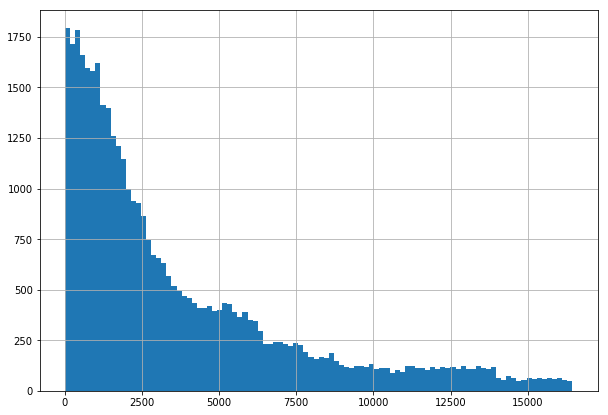

In [746]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

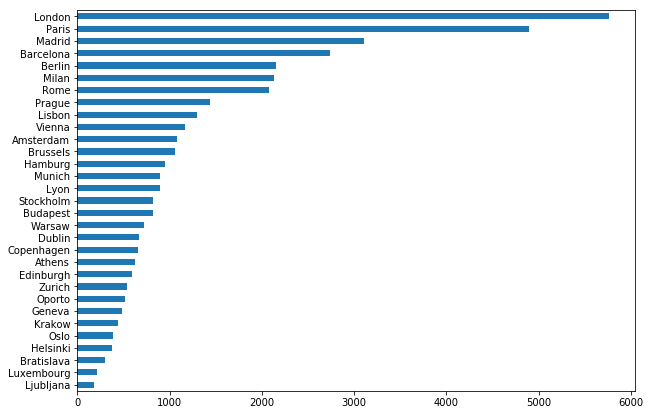

In [747]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

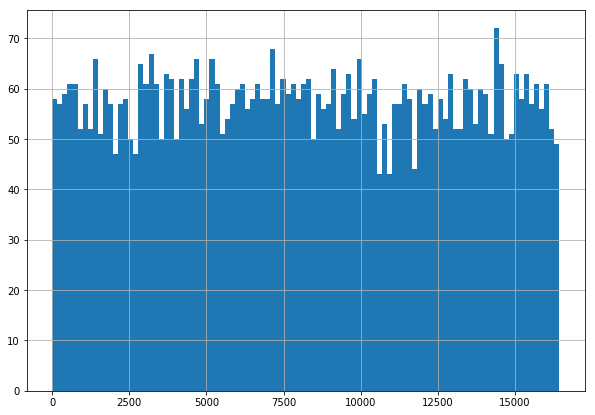

In [748]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

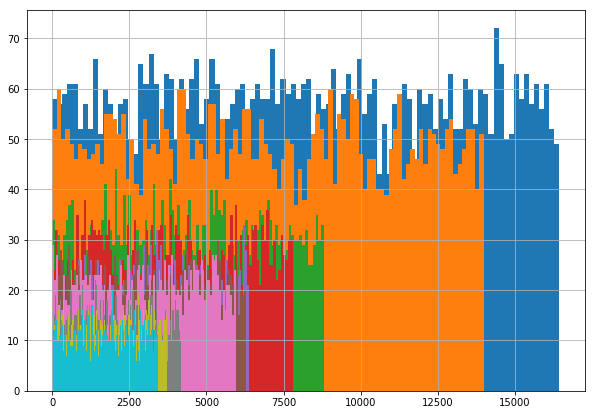

In [749]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

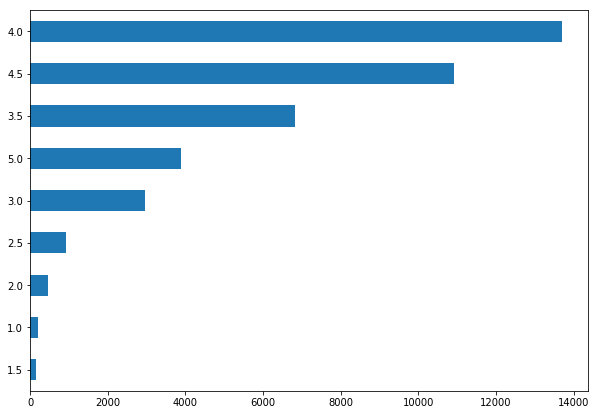

In [750]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

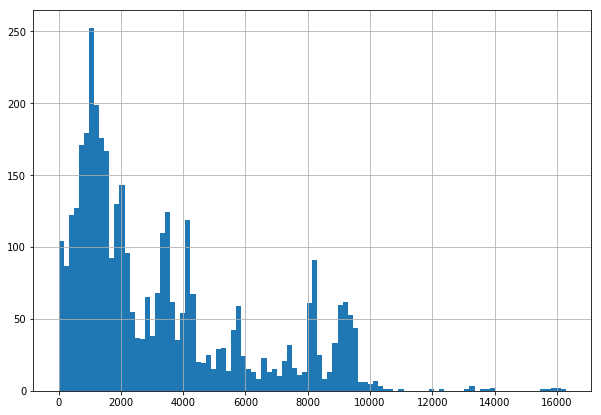

In [751]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

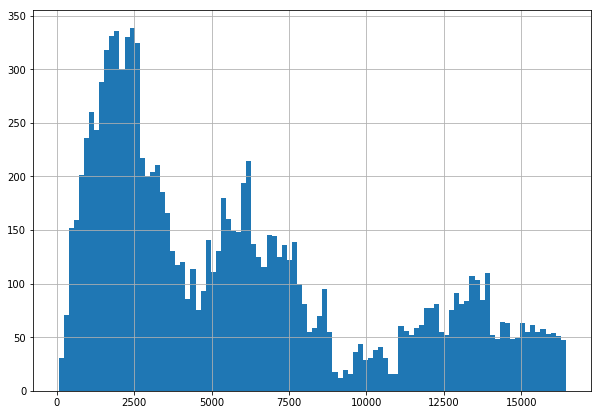

In [752]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

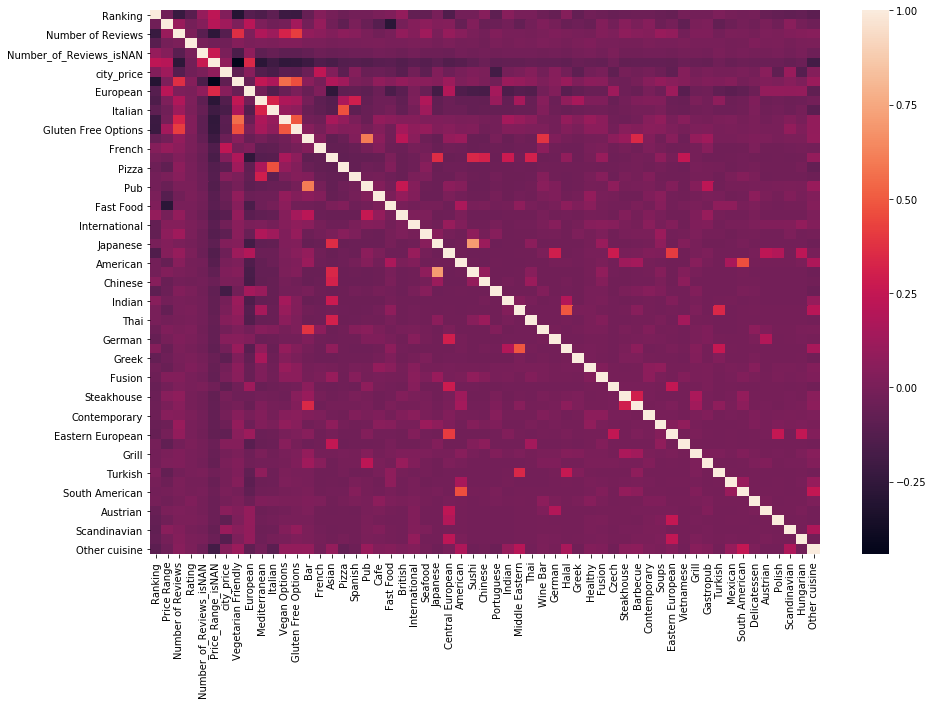

In [753]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

In [754]:
# количество ресторанов в городе
rest_count_dict = dict(data['City'].value_counts())
data['Rest_count'] = data['City'].map(rest_count_dict)

In [755]:
# количество человек
population = {'Amsterdam': 0.86, 'Athens': 0.66, 'Barcelona': 1.6, 'Berlin': 3.6, 'Bratislava': 0.4, 'Brussels': 0.19,
              'Budapest': 1.75, 'Copenhagen': 0.79, 'Dublin': 1.17, 'Edinburgh': 0.52, 'Geneva': 0.2, 'Hamburg': 1.84,
              'Helsinki': 0.64, 'Krakow': 0.78, 'Lisbon': 0.51, 'Ljubljana': 0.28, 'London': 8.91, 'Luxembourg': 0.12,
              'Lyon': 0.52, 'Madrid': 3.23, 'Milan': 1.34, 'Munich': 1.47, 'Oporto': 0.24, 'Oslo': 0.69, 'Paris': 2.15,
              'Prague': 1.32, 'Rome': 2.87, 'Stockholm': 0.98, 'Vienna': 1.9, 'Warsaw': 1.79, 'Zurich': 0.43}
data['population'] = data['City'].map(population)

In [756]:
# площадь
area = {'Amsterdam': 219, 'Athens': 412, 'Barcelona': 101, 'Berlin': 891, 'Bratislava': 368, 'Brussels': 32.6,
        'Budapest': 525, 'Copenhagen': 86.4, 'Dublin': 115, 'Edinburgh': 175, 'Geneva': 15.9, 'Hamburg': 755,
        'Helsinki': 715, 'Krakow': 327, 'Lisbon': 100, 'Ljubljana': 163, 'London': 1706, 'Luxembourg': 51.5,
        'Lyon': 47.9, 'Madrid': 607, 'Milan': 181, 'Munich': 310, 'Oporto': 41.7, 'Oslo': 454, 'Paris': 105,
        'Prague': 496, 'Rome': 1287, 'Stockholm': 188, 'Vienna': 414, 'Warsaw': 517, 'Zurich': 91.9}
data['area'] = data['City'].map(area)

In [757]:
# плотность
data['density'] = data['population']/data['area']

In [758]:
# сколько кухонь в ресторане
data['count_cuisine'] = data['Cuisine Style'].apply(lambda x:len(x))

In [759]:
# максимальный ранг по городу и отношение ранга к максимальному
max_city_ranking = dict(data.groupby(['City'])['Ranking'].max())
data['Max_Ranking'] = data['City'].map(max_city_ranking)
data['Relative_ranking'] = data['Ranking']/data['Max_Ranking']

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [760]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [761]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    df_output['Cuisine_NaN'] = df_output['Cuisine Style'].isna().astype('uint8')
    df_output['Price_NaN'] = df_output['Price Range'].isna().astype('uint8')
    df_output['Reviews_NaN'] = df_output['Reviews'].isna().astype('uint8')
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na

    Cuisine_ser = df_output[~df_output['Cuisine Style'].isna()]['Cuisine Style']
    Cuisine_ser = Cuisine_ser.astype('str').apply(lambda x: eval(x))
    Cuisine_ser = Cuisine_ser.explode()
    Cuisine_cnts = Cuisine_ser.value_counts()
    
    Cuisine_limit = 400 
    Cuisine_columns = list(Cuisine_cnts[Cuisine_cnts > Cuisine_limit].index)
    Other_columns = list(set(Cuisine_cnts.index) - set(Cuisine_columns))
    
    df_output['Cuisine Style'] = df_output['Cuisine Style'].fillna(
    "['European']")
    
    df_output['Cuisine Style'] = df_output['Cuisine Style'].astype('str').apply(lambda x: eval(x))

    for Cuisine in Cuisine_columns:
        df_output[Cuisine] = df_output['Cuisine Style'].astype(
            'str').apply(lambda x: 1 if Cuisine in x else 0)


    def other_cuisine(cuisine_str):
        for Cuisine in Other_columns:
            if Cuisine in cuisine_str:
                return 1
        return 0


    df_output['Other cuisine'] = df_output['Cuisine Style'].astype(
        'str').apply(other_cuisine)
    
    df_output['Price Range'] = df_output['Price Range'].fillna('$$ - $$$')
    price_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
    df_output['Price Range'] = df_output['Price Range'].map(price_dict)
    
    df_slice = df_output[df_output['Number of Reviews'].isna()]
    df_output = df_output.dropna(subset=['Number of Reviews'], axis=0)
    df_slice['Number of Reviews'] = df_slice['Reviews'].apply(
        lambda x: 0 if x == "[[], []]" else 1)
    df_output = pd.concat([df_output, df_slice])
    
    df_output['Reviews'] = df_output['Reviews'].fillna("[['', ''], ['', '']]")
    
    df_output['Reviews'] = df_output['Reviews'].apply(lambda x: x.replace(
        'nan', '').replace("[,", "['',").replace('[[], []]', "[['', ''], ['', '']]"))
    df_output['Reviews'] = df_output['Reviews'].apply(lambda x: eval(x))
    
    df_output['Review_text_1'] = df_output['Reviews'].apply(
        lambda x: x[0][0])
    df_output['Review_text_2'] = df_output['Reviews'].apply(
        lambda x: x[0][1] if len(x[0]) == 2 else '')
    df_output['Review_date_1'] = df_output['Reviews'].apply(
        lambda x: x[1][0])
    df_output['Review_date_2'] = df_output['Reviews'].apply(
        lambda x: x[1][1] if len(x[1]) == 2 else '')
    df_output['Review_date_1'] = pd.to_datetime(
        df_output['Review_date_1'])
    df_output['Review_date_2'] = pd.to_datetime(
        df_output['Review_date_2'])
    
    min_date = min(df_output['Review_date_1'].min(),
                   df_output['Review_date_2'].min())
    df_output['Review_date_1'] = df_output['Review_date_1'].fillna(min_date)
    df_output['Review_date_2'] = df_output['Review_date_2'].fillna(min_date)
    
    
    # ################### 4. Feature Engineering ####################################################
    # количество ресторанов в городе
    rest_count_dict = dict(df_output['City'].value_counts())
    df_output['Rest_count'] = df_output['City'].map(rest_count_dict)
    
    population = {'Amsterdam': 0.86, 'Athens': 0.66, 'Barcelona': 1.6, 'Berlin': 3.6, 'Bratislava': 0.4, 'Brussels': 0.19,
                  'Budapest': 1.75, 'Copenhagen': 0.79, 'Dublin': 1.17, 'Edinburgh': 0.52, 'Geneva': 0.2, 'Hamburg': 1.84,
                  'Helsinki': 0.64, 'Krakow': 0.78, 'Lisbon': 0.51, 'Ljubljana': 0.28, 'London': 8.91, 'Luxembourg': 0.12,
                  'Lyon': 0.52, 'Madrid': 3.23, 'Milan': 1.34, 'Munich': 1.47, 'Oporto': 0.24, 'Oslo': 0.69, 'Paris': 2.15,
                  'Prague': 1.32, 'Rome': 2.87, 'Stockholm': 0.98, 'Vienna': 1.9, 'Warsaw': 1.79, 'Zurich': 0.43}
    df_output['population'] = df_output['City'].map(population)
    
    area = {'Amsterdam': 219, 'Athens': 412, 'Barcelona': 101, 'Berlin': 891, 'Bratislava': 368, 'Brussels': 32.6,
            'Budapest': 525, 'Copenhagen': 86.4, 'Dublin': 115, 'Edinburgh': 175, 'Geneva': 15.9, 'Hamburg': 755,
            'Helsinki': 715, 'Krakow': 327, 'Lisbon': 100, 'Ljubljana': 163, 'London': 1706, 'Luxembourg': 51.5,
            'Lyon': 47.9, 'Madrid': 607, 'Milan': 181, 'Munich': 310, 'Oporto': 41.7, 'Oslo': 454, 'Paris': 105,
            'Prague': 496, 'Rome': 1287, 'Stockholm': 188, 'Vienna': 414, 'Warsaw': 517, 'Zurich': 91.9}
    df_output['area'] = df_output['City'].map(area)
    
    #Плотность населения на основе двух предыдущих
    df_output['density'] = df_output['population']/df_output['area']
    
    
    #Сколько типов кухонь в ресторане
    df_output['count_cuisine'] = df_output['Cuisine Style'].apply(lambda x:len(x))
    
    #Максимальный ранг по городу и отношение ранга к максимальному
    max_city_ranking = dict(df_output.groupby(['City'])['Ranking'].max())
    df_output['Max_Ranking'] = df_output['City'].map(max_city_ranking)
    df_output['Relative_ranking'] = df_output['Ranking']/df_output['Max_Ranking']
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object' or df_output[s].dtypes == 'datetime64[ns]']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [762]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,Cuisine_NaN,Price_NaN,Reviews_NaN,Vegetarian Friendly,European,...,Scandinavian,Hungarian,Other cuisine,Rest_count,population,area,density,count_cuisine,Max_Ranking,Relative_ranking
8525,88.0,2,366.0,0,0.0,0,0,0,0,1,...,0,0,0,1126,0.52,47.9,0.010856,2,2666.0,0.033008
33776,1854.0,2,43.0,1,4.5,0,0,0,1,0,...,0,0,1,7193,8.91,1706.0,0.005223,5,16444.0,0.112746
43113,6041.0,2,128.0,1,2.5,0,0,0,0,0,...,0,0,0,2694,1.34,181.0,0.007403,1,6275.0,0.962709
12911,1205.0,1,76.0,1,4.0,0,0,0,1,0,...,0,0,0,2705,3.60,891.0,0.004040,6,6372.0,0.189109
36716,8092.0,1,13.0,1,5.0,0,0,0,0,0,...,0,0,0,7193,8.91,1706.0,0.005223,1,16444.0,0.492094
2438,2871.0,2,4.0,0,0.0,1,1,0,0,1,...,0,0,0,1372,0.86,219.0,0.003927,1,3254.0,0.882299
5801,3968.0,2,8.0,0,0.0,1,1,0,0,1,...,0,0,0,1816,1.32,496.0,0.002661,1,4188.0,0.947469
24507,1356.0,2,81.0,1,3.5,0,0,0,0,0,...,0,0,0,819,0.79,86.4,0.009144,3,1964.0,0.690428
5679,1446.0,2,26.0,0,0.0,0,0,0,0,1,...,0,0,0,925,1.79,517.0,0.003462,2,2154.0,0.671309
30739,1463.0,2,0.0,1,5.0,0,0,0,0,0,...,0,0,0,1126,0.52,47.9,0.010856,2,2666.0,0.548762


In [763]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 65 columns):
Ranking                50000 non-null float64
Price Range            50000 non-null int64
Number of Reviews      50000 non-null float64
sample                 50000 non-null int64
Rating                 50000 non-null float64
Cuisine_NaN            50000 non-null uint8
Price_NaN              50000 non-null uint8
Reviews_NaN            50000 non-null uint8
Vegetarian Friendly    50000 non-null int64
European               50000 non-null int64
Mediterranean          50000 non-null int64
Italian                50000 non-null int64
Vegan Options          50000 non-null int64
Gluten Free Options    50000 non-null int64
Bar                    50000 non-null int64
French                 50000 non-null int64
Asian                  50000 non-null int64
Pizza                  50000 non-null int64
Spanish                50000 non-null int64
Pub                    50000 non-null int64
Cafe 

In [764]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [765]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [766]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 64), (40000, 64), (40000, 63), (32000, 63), (8000, 63))

# Model 
Сам ML

In [767]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [768]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [769]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [770]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.206254375


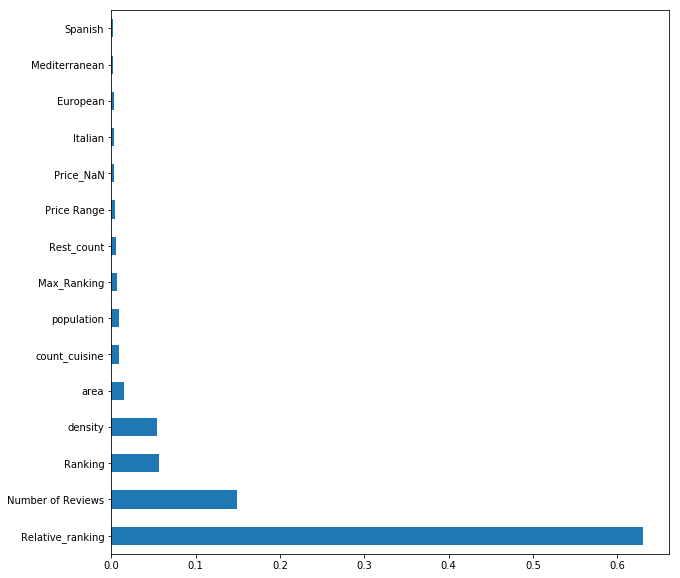

In [771]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [772]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,Cuisine_NaN,Price_NaN,Reviews_NaN,Vegetarian Friendly,European,Mediterranean,...,Scandinavian,Hungarian,Other cuisine,Rest_count,population,area,density,count_cuisine,Max_Ranking,Relative_ranking
9100,3000.0,3,26.0,0.0,0,0,0,0,0,0,...,0,0,0,2694,1.34,181.0,0.007403,1,6275.0,0.478088
5480,4942.0,2,5.0,0.0,1,1,0,0,1,0,...,0,0,0,2694,1.34,181.0,0.007403,1,6275.0,0.787570
6083,715.0,2,7.0,0.0,1,1,0,0,1,0,...,0,0,0,925,1.79,517.0,0.003462,1,2154.0,0.331941
1621,461.0,2,709.0,0.0,0,0,0,1,0,0,...,0,0,1,1372,0.86,219.0,0.003927,5,3254.0,0.141672
2232,3248.0,2,176.0,0.0,0,0,0,0,0,0,...,0,0,0,3395,1.60,101.0,0.015842,3,7796.0,0.416624
8591,1672.0,2,37.0,0.0,0,1,0,0,0,0,...,0,0,1,745,0.52,175.0,0.002971,7,1766.0,0.946772
3857,1048.0,2,182.0,0.0,0,0,0,1,1,0,...,0,0,0,2705,3.60,891.0,0.004040,4,6372.0,0.164470
511,1913.0,2,0.0,0.0,0,1,0,0,0,0,...,0,0,0,1021,1.75,525.0,0.003333,1,2440.0,0.784016
997,578.0,2,216.0,0.0,0,0,0,1,1,0,...,0,0,0,819,0.79,86.4,0.009144,3,1964.0,0.294297
2002,674.0,2,135.0,0.0,0,0,0,1,1,0,...,0,0,0,6108,2.15,105.0,0.020476,5,13986.0,0.048191


In [773]:
test_data = test_data.drop(['Rating'], axis=1)

In [774]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [775]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [776]:
predict_submission

array([3.005, 4.215, 4.315, ..., 3.015, 4.505, 4.205])

In [777]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.005
1,id_1,4.215
2,id_2,4.315
3,id_3,4.330
4,id_4,4.450
5,id_5,4.610
6,id_6,2.250
7,id_7,3.025
8,id_8,4.115
9,id_9,4.715


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
